# PCA(Principal Component Analysis) - 주성분 분석

- 여러개의 변수(특성 Feature): 대표할 수 있는 **'주성분'** 이라는 새로운 변수 만들기
- 여러개의 3D 이미지를 잘 설명할 수 있는 **'2D 이미지(그림자)'** 찾기 
```
고차원 데이터를 저차원으로 축소하면서도, 데이터의 주요 정보(분산)를 최대한 보존하는 방법
데이터의 패턴을 단순화하고 시각화, 노이즈 제거, 모델 효율성 향상 등에 널리



| 용어                           | 의미                                            |
| ---------------------------- | --------------------------------------------- |
| **차원(Dimension)**            | 데이터의 변수 개수 (예: 키, 몸무게, 나이 → 3차원)              |
| **분산(Variance)**             | 데이터가 얼마나 흩어져 있는가 (정보의 양을 나타냄)                 |
| **주성분(Principal Component)** | 원래 변수들의 선형 결합으로 만든, **가장 큰 분산을 갖는 새로운 축(방향)** |
| **고유값(Eigenvalue)**          | 각 주성분이 설명하는 **분산의 크기(중요도)**                   |
| **고유벡터(Eigenvector)**        | 각 주성분의 **방향(축)**                              |


- 작동원리

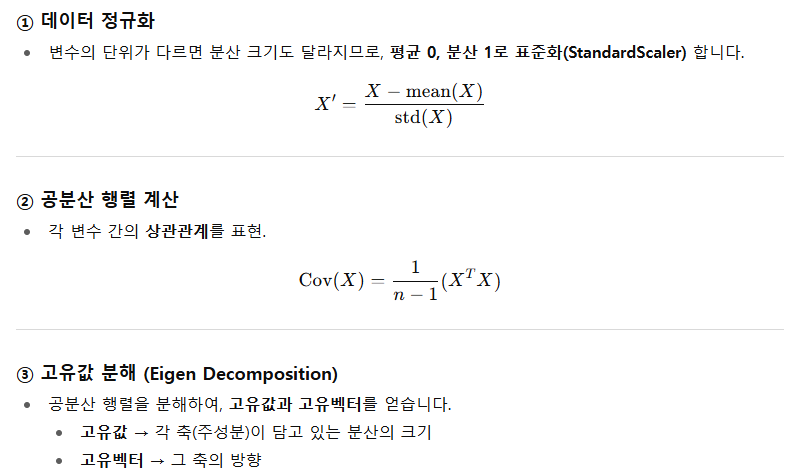

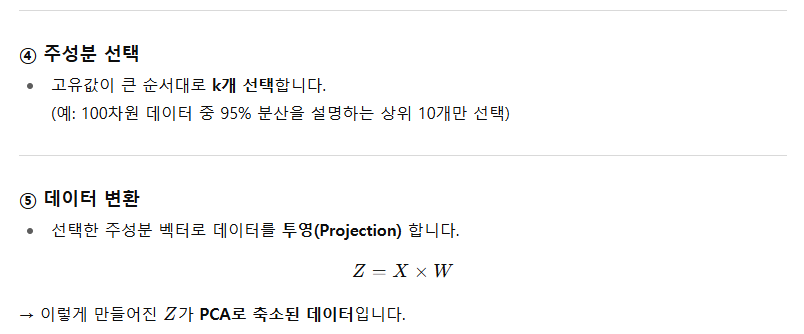


---

### 1단계: 데이터 표준화(Standardization)
```
각 변수의 평균을 0, 분산을 1로 만들어 모든 데이터가 동일한 스케일을 갖게 함
```

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [11]:
# 예제데이터 붓꽃
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
df = iris.data
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 입력, 타깃 분리
X = df.loc[:, :"petal width (cm)"].values
y = df['target']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 확인
print(X_scaled[:5])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


### 2단계: 공분산 행렬 계산(Convariance Matrix)
```
- 공분산: 두 변수가 함께 어떻게 변하는지 나타내는 값
- 양수: 한 변수가 장가할 때 같이 증가함
- 음수: 한 변수가 감소할 때 같이 감소함
- 공분산 행렬: 모든 변수 쌍들의 공분산을 행렬로 정리한 것 -> 이 행렬을 통해 데이터가 어떤 방향으로 퍼져있는지 알 수 있음.

### 3단계: 고유값과 고유벡터 계산
```
- 공분산 행렬을 이용해 고유벡터 찾기
- 고유값 벡터: 데이터가 어떤 방향으로 가장 크게 분산(퍼져있는 정도)되어 있는지를 나타내는 방향 벡터. 이 방향이 새로운 축 = 주성분
- 고유값: 해당 고유벡터 방향으로 데이터가 얼마나 많이 퍼져있는지 나타내는 힘의 크기. 이 값이 크면 그 방향이 데이터를 더 많이 설명한다는 의미
```

- PCA 고유값의 크기 순서에 따라 제1 주성분(PC1), 제2 주성분(PC2) 등.. 
    - PC1: 데이터를 가장 잘 설명하는 축
    - PC2: PC1과 직각을 이루면서 그 다음으로 데이터를 잘 표현하는 축

### 4단계: 주성분 결정 및 데이터 변환
```
계산된 고유벡터축에 원래 데이터를 투영(projection)하여 차원을 축소!
```
붓꽃은 4개의 특성를 2개의 주성분(2차원)으로 변환해 시각화

In [19]:
# 2,3,4 단계: PCA 수행 및 데이터 변환
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 주성분 분석 결과를 데이터프레임으로 변환
df_pca = pd.DataFrame(data=X_pca, columns=['PC1','PC2'])
df_pca['target'] = df.target
df_pca

,PC1,PC2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


설명된 분산 비율: [0.72962445 0.22850762]
주성분 벡터(방향): [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]


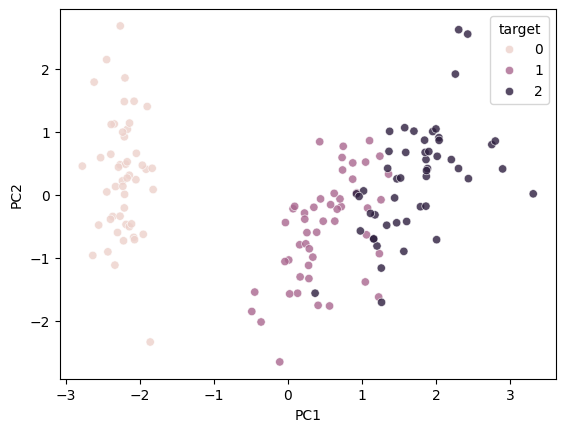

In [22]:
# 각 주성분이 설명하는 분산의 양(고유값의 중요도)
print("설명된 분산 비율:", pca.explained_variance_ratio_) #주성분 두 개만으로 전체대비 95.7% 설명
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='target', alpha=0.8)

print("주성분 벡터(방향):", pca.components_)

# 예제
1. 데이터 전처리
2. 모델을 적용하고 score 확인
---------------------------------
1. 전처리한 데이터를 갖고 PCA로 주성분을 적절한 개수로 설정하여 데이터 변환
2. 모델을 적용하고 score 확인

In [ ]:
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor

#  데이터셋 예측
diabetes = datasets.load_diabetes(as_frame=True)

X, y = diabetes.data, diabetes.target
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target

diabetes_df.head(3)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0


In [78]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [79]:
diabetes_df.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [45]:
print('<x_data[0]> : ',X[0])
print()
print('<y_data[0]> : ',y[0] )

<x_data[0]> :  [ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]

<y_data[0]> :  151.0


In [84]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[ 0.80050009,  1.06548848,  1.29708846,  0.45984057, -0.92974581,
        -0.73206462, -0.91245053, -0.05449919,  0.41853093, -0.37098854],
       [-0.03956713, -0.93853666, -1.08218016, -0.55350458, -0.17762425,
        -0.40288615,  1.56441355, -0.83030083, -1.43658851, -1.93847913],
       [ 1.79330681,  1.06548848,  0.93453324, -0.1192138 , -0.95867356,
        -0.71889748, -0.68024452, -0.05449919,  0.06015558, -0.54515416],
       [-1.87244107, -0.93853666, -0.24377122, -0.77064997,  0.25629203,
         0.52539714, -0.75764652,  0.72130245,  0.47698252, -0.19682291],
       [ 0.11317236, -0.93853666, -0.76494435,  0.45984057,  0.08272552,
         0.32789006,  0.17117751, -0.05449919, -0.67250161, -0.98056821]])

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)
len(X_train), len(X_test), len(y_train)

(353, 89, 353)

In [91]:
from sklearn.metrics import mean_squared_error,r2_score
rf_dia =  RandomForestRegressor()
rf_dia.fit(X_train,y_train)
y_pred = rf_dia.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
r2_1 = rf_dia.score(X_train,y_train)
r2_2 = rf_dia.score(X_test,y_test)

mse, r2_1,r2_2


(3060.2438224719103, 0.9240194828466614, 0.42239407859000455)

In [92]:
# PCA
from sklearn.decomposition import PCA

In [101]:
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


# 주성분 분석 결과를 데이터프레임으로 변환
df_pca = pd.DataFrame(data=X_pca, columns=['PC1','PC2'])
df_pca

,PC1,PC2
0,0.587199,-1.946832
1,-2.831625,1.372082
2,0.272129,-1.634901
3,0.049281,0.382278
4,-0.756421,0.811960
...,...,...
437,1.239525,-1.035968
438,1.264719,0.761319
439,-0.205206,-1.205487
440,0.692871,0.210127


`pca_1 = pca.score(X_train_pca,y_train)` <br>
`pca_2 = pca.score(X_test_pca,y_test)` <br>
=> PCA는 비지도 학습이므로 , y_train, y_test 같은 *정답(label)이 존재하지 않음* <br>
PCA.score()는 회귀나 분류의 정확도 점수가 아니라, 데이터의 log-likelihood(로그 우도) 값을 반환 

In [98]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.39839796 0.14697333]
0.545371290872869


In [103]:
# 하이퍼 파라미터 튜닝
# 하이퍼 파라미터: 학습에 영향을 주는 모든 파라미터

from sklearn.model_selection import GridSearchCV

X_scaled = StandardScaler().fit_transform(X)
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)
rfr = RandomForestRegressor()
param_grid = {
    'max_depth':[3,5,10,12,15],
    'max_features':['sqrt','log2'],
    'min_samples_split': [1,2,5,10],
    'min_samples_leaf': [1,3,5,7],
}
gridcv = GridSearchCV(rfr,return_train_score=True,param_grid=param_grid)
gridcv.fit(x_train,y_train)

c:\python_src\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
200 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "c:\python_src\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python_src\.venv\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "c:\python_src\.venv\Lib\site-packages\sklearn\base.py", line 471, in _validate_params
    validate_parameter_constraints(
  File "c:\python_src\.venv\Lib\site-packages\sklearn\utils\_param_v

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [3, 5, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 3, ...], 'min_samples_split': [1, 2, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,100
